## Compares interpretability performance of attribution scores for task 3


Figures generated from this notebook include:
- Fig. 2a-c
- Extended Data Fig. 2a and b
- Supplementary Fig. 11


In [ ]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
import helper

In [47]:
results_path = os.path.join('../results', 'task3')
params_path = os.path.join(results_path, 'model_params')
save_path = os.path.join(results_path, 'scores')

# load data
data_path = '../data/synthetic_code_dataset.h5'
data = helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]
X_model = test_model[true_index][:500]

# calculate interpertability perofrmance

In [48]:

num_trials = 10
model_names = ['cnn-local', 'cnn-dist']
activations = ['relu', 'exponential', 'sigmoid', 'tanh', 'softplus', 'linear', 'elu']
score_names = ['saliency_scores', 'mut_scores', 'integrated_scores', 'shap_scores']

results = {}
for model_name in model_names:
    for activation in activations:
        name = model_name+'_'+activation
        results[name] = {}
            
        file_path = os.path.join(save_path, name+'.pickle')
        with open(file_path, 'rb') as f:            
            saliency_scores = cPickle.load(f)
            mut_scores = cPickle.load(f)
            integrated_scores = cPickle.load(f)
            shap_scores = cPickle.load(f)

        all_scores = [saliency_scores, mut_scores, integrated_scores, shap_scores]

        for score_name, scores in zip(score_names, all_scores):
            shap_roc = []
            shap_pr = []
            for trial in range(num_trials):
                if 'mut' in score_name:
                    trial_scores = np.sqrt(np.sum(scores[trial]**2, axis=-1, keepdims=True)) * X
                else:
                    trial_scores = scores[trial] * X
                roc_score, pr_score = helper.interpretability_performance(X, trial_scores, X_model)
                shap_roc.append(np.mean(roc_score))
                shap_pr.append(np.mean(pr_score))    
                
            results[name][score_name] = [np.array(shap_roc), np.array(shap_pr)]
            print('%s: %.4f+/-%.4f\t'%(name+'_'+score_name, 
                                       np.mean(results[name][score_name][0]), 
                                       np.std(results[name][score_name][0]))) 
            
activations = ['shift_scale_relu', 'shift_scale_tanh', 'shift_scale_sigmoid', 'exp_relu']
for model_name in model_names:
    for activation in activations:
        name = model_name+'_'+activation
        results[name] = {}
            
        file_path = os.path.join(save_path, name+'.pickle')
        with open(file_path, 'rb') as f:            
            saliency_scores = cPickle.load(f)

        all_scores = [saliency_scores]
        
        for score_name, scores in zip(score_names, all_scores):
            shap_roc = []
            shap_pr = []
            for trial in range(num_trials):
                if 'mut' in score_name:
                    trial_scores = np.sqrt(np.sum(scores[trial]**2, axis=-1, keepdims=True)) * X
                else:
                    trial_scores = scores[trial] * X
                roc_score, pr_score = helper.interpretability_performance(X, trial_scores, X_model)
                shap_roc.append(np.mean(roc_score))
                shap_pr.append(np.mean(pr_score))    
                
            results[name][score_name] = [np.array(shap_roc), np.array(shap_pr)]
            print('%s: %.4f+/-%.4f\t'%(name+'_'+score_name, 
                                       np.mean(results[name][score_name][0]), 
                                       np.std(results[name][score_name][0]))) 
            

cnn-local_relu_saliency_scores: 0.7710+/-0.0132	
cnn-local_relu_mut_scores: 0.8084+/-0.0215	
cnn-local_relu_integrated_scores: 0.7800+/-0.0097	
cnn-local_relu_shap_scores: 0.8098+/-0.0148	
cnn-local_exponential_saliency_scores: 0.8271+/-0.0191	
cnn-local_exponential_mut_scores: 0.8871+/-0.0159	
cnn-local_exponential_integrated_scores: 0.8203+/-0.0157	
cnn-local_exponential_shap_scores: 0.8367+/-0.0174	
cnn-local_sigmoid_saliency_scores: 0.7536+/-0.0168	
cnn-local_sigmoid_mut_scores: 0.7885+/-0.0230	
cnn-local_sigmoid_integrated_scores: 0.7506+/-0.0164	
cnn-local_sigmoid_shap_scores: 0.7849+/-0.0163	
cnn-local_tanh_saliency_scores: 0.7312+/-0.0206	
cnn-local_tanh_mut_scores: 0.7639+/-0.0257	
cnn-local_tanh_integrated_scores: 0.7406+/-0.0187	
cnn-local_tanh_shap_scores: 0.7826+/-0.0194	
cnn-local_softplus_saliency_scores: 0.7877+/-0.0246	
cnn-local_softplus_mut_scores: 0.8282+/-0.0237	
cnn-local_softplus_integrated_scores: 0.7879+/-0.0204	
cnn-local_softplus_shap_scores: 0.8213+/-0.0224	

In [49]:
# save results
file_path = os.path.join(results_path, 'task3_attr_results.pickle')
with open(file_path, 'wb') as f:
    cPickle.dump(results, f, protocol=cPickle.HIGHEST_PROTOCOL)


# Print results table

In [50]:
# load results
file_path = os.path.join(results_path, 'task3_attr_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)

In [51]:
score_names = ['saliency_scores', 'mut_scores', 'integrated_scores', 'shap_scores']
activations = ['relu', 'exponential', 'sigmoid', 'tanh', 'softplus', 'linear', 'elu']

save_path = os.path.join(results_path, 'task3_attr_results_auroc.tsv')
with open(save_path, 'w') as f:
    for model_name in model_names:
        for activation in activations:
            name = model_name+'_'+activation
            f.write('%s\t'%(name)) 
            for score_name in score_names:
                f.write('%.4f+/-%.4f\t'%(np.mean(results[name][score_name][0]), 
                                         np.std(results[name][score_name][0])))
            f.write('\n')
            
save_path = os.path.join(results_path, 'task3_attr_results_aupr.tsv')
with open(save_path, 'w') as f:
    for model_name in model_names:
        for activation in activations:
            name = model_name+'_'+activation
            f.write('%s\t'%(name)) 
            for score_name in score_names:
                f.write('%.4f+/-%.4f\t'%(np.mean(results[name][score_name][1]), 
                                         np.std(results[name][score_name][1])))
            f.write('\n')
            
            

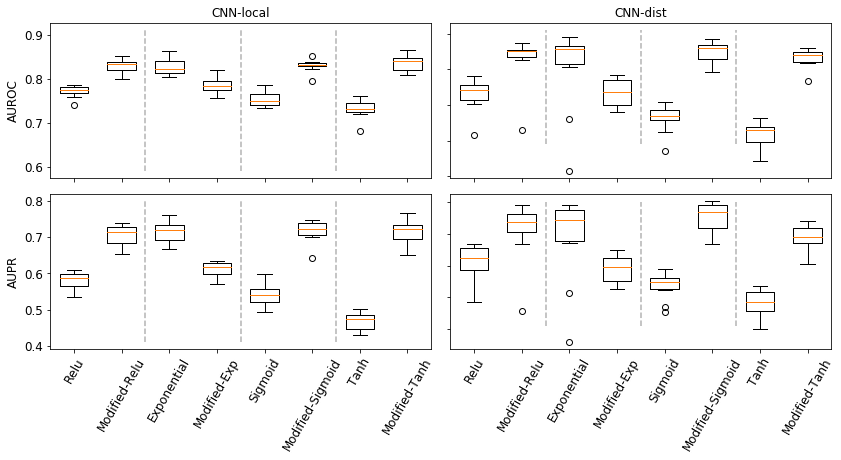

In [53]:

plot_activations =  ['Relu', 'Modified-Relu', 'Exponential', 'Modified-Exp', 'Sigmoid', 'Modified-Sigmoid', 'Tanh', 
                     'Modified-Tanh']

fig = plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace=0.05, hspace=.1)
ax = plt.subplot(2,2,1)
score_name = 'saliency_scores'
model_name = 'cnn-local'
vals = [results[model_name+'_relu'][score_name][0], 
        results[model_name+'_shift_scale_relu'][score_name][0],
        results[model_name+'_exponential'][score_name][0], 
        results[model_name+'_exp_relu'][score_name][0],
        results[model_name+'_sigmoid'][score_name][0],
        results[model_name+'_shift_scale_sigmoid'][score_name][0],  
        results[model_name+'_tanh'][score_name][0], 
        results[model_name+'_shift_scale_tanh'][score_name][0],
       ]
ax.boxplot(vals,  widths = 0.6);
        
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)
ax.tick_params(labelbottom=False) 

plt.title('CNN-local', fontsize=12)

ax = plt.subplot(2,2,2)
score_name = 'saliency_scores'
model_name = 'cnn-dist'
vals = [results[model_name+'_relu'][score_name][0], 
        results[model_name+'_shift_scale_relu'][score_name][0],
        results[model_name+'_exponential'][score_name][0], 
        results[model_name+'_exp_relu'][score_name][0],
        results[model_name+'_sigmoid'][score_name][0],
        results[model_name+'_shift_scale_sigmoid'][score_name][0],  
        results[model_name+'_tanh'][score_name][0], 
        results[model_name+'_shift_scale_tanh'][score_name][0]
       ]
ax.boxplot(vals,  widths = 0.6);
#plt.ylabel('AUROC', fontsize=12)
#plt.yticks([0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.90])
ax.set_xbound([.5,8.5])
ax.tick_params(labelleft=False) 
ax.tick_params(labelbottom=False) 
plt.title('CNN-dist', fontsize=12)
plt.vlines(2.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(4.5, .59, 0.91, linestyle='--', alpha=0.3)
plt.vlines(6.5, .59, 0.91, linestyle='--', alpha=0.3)

ax = plt.subplot(2,2,3)
score_name = 'saliency_scores'
model_name = 'cnn-local'
vals = [results[model_name+'_relu'][score_name][1], 
        results[model_name+'_shift_scale_relu'][score_name][1],
        results[model_name+'_exponential'][score_name][1], 
        results[model_name+'_exp_relu'][score_name][1],
        results[model_name+'_sigmoid'][score_name][1],
        results[model_name+'_shift_scale_sigmoid'][score_name][1],  
        results[model_name+'_tanh'][score_name][1], 
        results[model_name+'_shift_scale_tanh'][score_name][1]
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUPR', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.8])
ax.set_xbound([.5,8.5])
plt.vlines(2.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(4.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(6.5, .41, 0.8, linestyle='--', alpha=0.3)

ax = plt.subplot(2,2,4)
score_name = 'saliency_scores'
model_name = 'cnn-dist'
vals = [results[model_name+'_relu'][score_name][1], 
        results[model_name+'_shift_scale_relu'][score_name][1],
        results[model_name+'_exponential'][score_name][1], 
        results[model_name+'_exp_relu'][score_name][1],
        results[model_name+'_sigmoid'][score_name][1],
        results[model_name+'_shift_scale_sigmoid'][score_name][1],  
        results[model_name+'_tanh'][score_name][1], 
        results[model_name+'_shift_scale_tanh'][score_name][1]
       ]
ax.boxplot(vals,  widths = 0.6);
#plt.ylabel('AUpr', fontsize=12)
#plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=12)
plt.xticks(np.linspace(1,9,9), plot_activations, fontsize=12, rotation=60)
ax.set_ybound([.59,0.8])
ax.set_xbound([.5,8.5])
ax.tick_params(labelleft=False) 
plt.vlines(2.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(4.5, .41, 0.8, linestyle='--', alpha=0.3)
plt.vlines(6.5, .41, 0.8, linestyle='--', alpha=0.3)

outfile = os.path.join(results_path, 'task3_compare_attr_score_modified.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

        

# Performance comparison results

In [54]:
# save results
file_path = os.path.join(results_path, 'task3_performance_results.pickle')
with open(file_path, 'rb') as f:
    performance = cPickle.load(f)

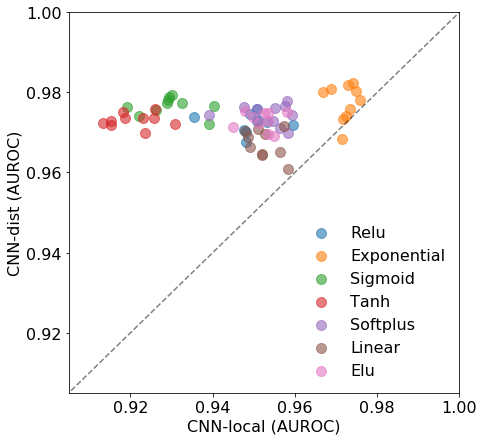

In [55]:


fig = plt.figure(figsize=(7,7))
for activation in activations:
    name = 'cnn-local_'+activation
    name2 = 'cnn-dist_'+activation
    ax = plt.scatter(performance[name][0], performance[name2][0], alpha=0.6, s=100)
plt.legend(activation_names, fontsize=16, frameon=False)
plt.plot([0.9, 1.0], [0.90, 1.0], '--k', alpha=0.5)
plt.xticks([0.92, 0.94, 0.96, 0.98, 1.], fontsize=16)
plt.yticks([0.92, 0.94, 0.96, 0.98, 1.], fontsize=16)
plt.ylim(0.905, 1.0)
plt.xlim(0.905, 1.0)
plt.xlabel('CNN-local (AUROC)', fontsize=16)
plt.ylabel('CNN-dist (AUROC)', fontsize=16)
outfile = os.path.join(results_path, 'task3_compare_cnn_attr_score_performance.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

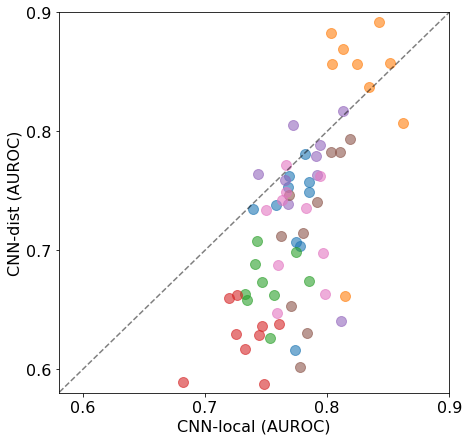

In [56]:
score_name = 'saliency_scores'
model_name = 'cnn-local'
vals = []
for activation in activations:
    name = model_name+'_'+activation
    vals.append(results[name][score_name][0])
    
model_name = 'cnn-dist'
vals2 = []
for activation in activations:
    name = model_name+'_'+activation
    vals2.append(results[name][score_name][0])

fig = plt.figure(figsize=(7,7))
for i in range(len(vals)):
    ax = plt.scatter(vals[i], vals2[i], alpha=0.6, s=100)
#plt.legend(activations, fontsize=16, frameon=False)
plt.plot([0.35, 0.9], [0.35, 0.9], '--k', alpha=0.5)
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=16)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=16)
plt.ylim(0.58, 0.9)
plt.xlim(0.58, 0.9)
plt.xlabel('CNN-local (AUROC)', fontsize=16)
plt.ylabel('CNN-dist (AUROC)', fontsize=16)
outfile = os.path.join(results_path, 'task3_compare_cnn_attr_score_roc.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

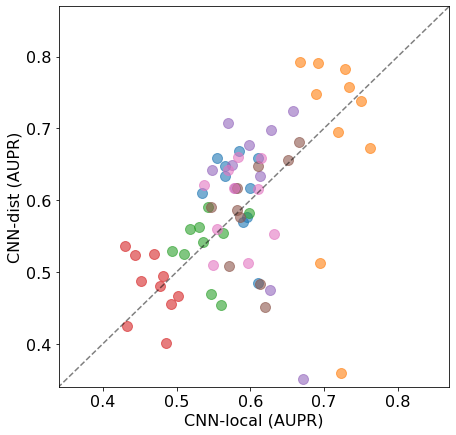

In [57]:
score_name = 'saliency_scores'
model_name = 'cnn-local'
vals = []
for activation in activations:
    name = model_name+'_'+activation
    vals.append(results[name][score_name][1])
    
model_name = 'cnn-dist'
vals2 = []
for activation in activations:
    name = model_name+'_'+activation
    vals2.append(results[name][score_name][1])

fig = plt.figure(figsize=(7,7))
for i in range(len(vals)):
    ax = plt.scatter(vals[i], vals2[i], alpha=0.6, s=100)
#plt.legend(activations, fontsize=16, frameon=False)
plt.plot([0.3, 0.9], [0.3, 0.9], '--k', alpha=0.5)
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=16)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], fontsize=16)
plt.ylim(0.34, 0.87)
plt.xlim(0.34, 0.87)
plt.xlabel('CNN-local (AUPR)', fontsize=16)
plt.ylabel('CNN-dist (AUPR)', fontsize=16)
outfile = os.path.join(results_path, 'task3_compare_cnn_attr_score_pr.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

# Compare different attribution methods 

First plot is using the interpretability performance metric AUROC and the second plot is AUPR.

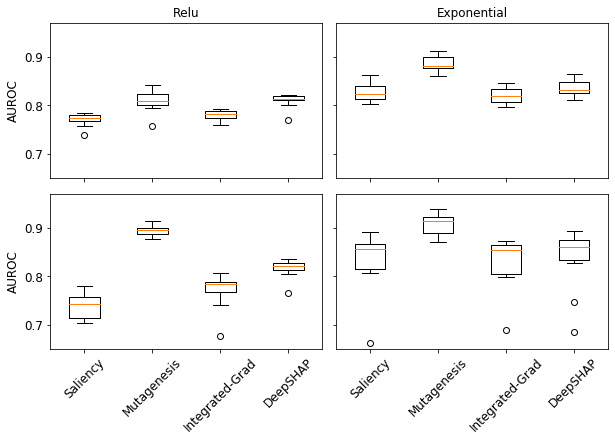

In [59]:

score_names = ['saliency_scores', 'mut_scores', 'integrated_scores', 'shap_scores']
names = ['Saliency', 'Mutagenesis', 'Integrated-Grad', 'DeepSHAP']
activations = ['relu', 'exponential', 'sigmoid', 'tanh', 'softplus', 'linear', 'elu']

fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

ax = plt.subplot(2,2,1)
model_name = 'cnn-local'
vals = []
for score_name in score_names:
    name = model_name+'_relu'
    vals.append(results[name][score_name][0])    
ax.boxplot(vals);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.7, 0.8, 0.9, 1.0], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
ax.set_ybound([.65,.97])
ax.tick_params(labelbottom=False) 
plt.title('Relu', fontsize=12)

ax = plt.subplot(2,2,2)

model_name = 'cnn-local'
vals = []
for score_name in score_names:
    name = model_name+'_exponential'
    vals.append(results[name][score_name][0])
ax.boxplot(vals);
#plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.7, 0.8, 0.9, 1.0], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
ax.set_ybound([.65,.97])
ax.tick_params(labelleft=False) 
ax.tick_params(labelbottom=False) 
#plt.xticks(range(1,8), activations, fontsize=12, rotation=45);
plt.title('Exponential', fontsize=12)


ax = plt.subplot(2,2,3)

model_name = 'cnn-dist'
vals = []
for score_name in score_names:
    name = model_name+'_relu'
    vals.append(results[name][score_name][0])
ax.boxplot(vals);
plt.yticks([0.7, 0.8, 0.9, 1.0], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
plt.ylabel('AUROC', fontsize=12)
ax.set_ybound([.65,.97])
#plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(2,2,4)

model_name = 'cnn-dist'
vals = []
for score_name in score_names:
    name = model_name+'_exponential'
    vals.append(results[name][score_name][0])
ax.boxplot(vals);
#plt.ylabel('AUPR', fontsize=12)
plt.yticks([0.7, 0.8, 0.9, 1.0], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
ax.tick_params(labelleft=False) 
ax.set_ybound([.65,.97])

#plt.title('CNN-deep', fontsize=12)
outfile = os.path.join(results_path, 'task3_compare_attr_methods_roc.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

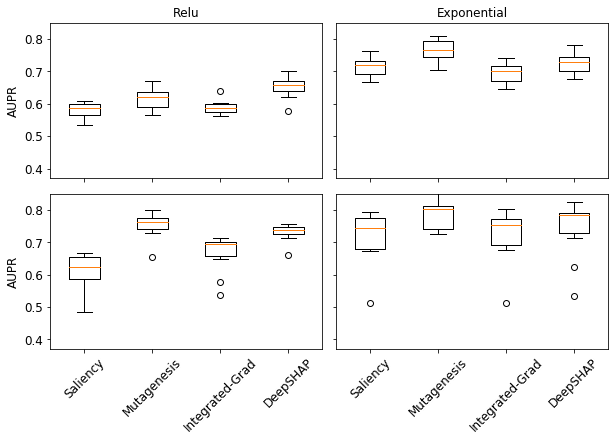

In [60]:
score_names = ['saliency_scores', 'mut_scores', 'integrated_scores', 'shap_scores']
names = ['Saliency', 'Mutagenesis', 'Integrated-Grad', 'DeepSHAP']
activations = ['relu', 'exponential', 'sigmoid', 'tanh', 'softplus', 'linear', 'elu']

fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

ax = plt.subplot(2,2,1)
model_name = 'cnn-local'
vals = []
for score_name in score_names:
    name = model_name+'_relu'
    vals.append(results[name][score_name][1])    
ax.boxplot(vals);
plt.ylabel('AUPR', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
ax.set_ybound([.37,.85])
ax.tick_params(labelbottom=False) 
plt.title('Relu', fontsize=12)

ax = plt.subplot(2,2,2)
model_name = 'cnn-local'
vals = []
for score_name in score_names:
    name = model_name+'_exponential'
    vals.append(results[name][score_name][1])
ax.boxplot(vals);
#plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
ax.set_ybound([.37,.85])
ax.tick_params(labelleft=False) 
ax.tick_params(labelbottom=False) 
#plt.xticks(range(1,8), activations, fontsize=12, rotation=45);
plt.title('Exponential', fontsize=12)


ax = plt.subplot(2,2,3)

model_name = 'cnn-dist'
vals = []
for score_name in score_names:
    name = model_name+'_relu'
    vals.append(results[name][score_name][1])
ax.boxplot(vals);
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
plt.ylabel('AUPR', fontsize=12)
ax.set_ybound([.37,.85])
#plt.title('CNN-shallow', fontsize=12)

ax = plt.subplot(2,2,4)

model_name = 'cnn-dist'
vals = []
for score_name in score_names:
    name = model_name+'_exponential'
    vals.append(results[name][score_name][1])
ax.boxplot(vals);
#plt.ylabel('AUPR', fontsize=12)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8], fontsize=12)
plt.xticks(range(1,5), names, fontsize=12, rotation=45)
ax.tick_params(labelleft=False) 
ax.set_ybound([.37,.85])

#plt.title('CNN-deep', fontsize=12)
outfile = os.path.join(results_path, 'task3_compare_attr_methods_pr.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')